In [1]:
%matplotlib inline
import numpy
import pandas
import common
from decimal import Decimal
from matplotlib import pyplot as plt
plt.style.use('seaborn-poster')
import itertools

In [2]:
def simulate_withdrawals(series, years=50):
    portfolio = common.Portfolio(600000, 400000)
    strategy = common.PrimeHarvesting(portfolio).harvest()
    strategy.send(None)
    withdrawal_strategy = common.ConstantWithdrawals(portfolio, strategy, rate=Decimal('0.05')).withdrawals()
    withdrawal_strategy.send(None)
    annual = []
    for _, d in zip(range(years), series):
        #print(d)
        data = withdrawal_strategy.send(d)
        annual.append(data)
    return annual

def simulate_em_withdrawals(series, years=40, harvesting=common.PrimeHarvesting):
    portfolio = common.Portfolio(500000, 500000)
    strategy = harvesting(portfolio).harvest()
    #strategy = common.PrimeHarvesting(portfolio).harvest()
    strategy.send(None)
    withdrawal_strategy = common.EM(portfolio, strategy).withdrawals()
    withdrawal_strategy.send(None)
    annual = []
    for _, d in zip(range(years), series):
        data = withdrawal_strategy.send(d)
        annual.append(data)
    return annual

In [5]:
data_series = common.Returns_US_1871()

x = simulate_em_withdrawals(data_series.iter_from(1966), years=40)
y = simulate_em_withdrawals(data_series.iter_from(1966), years=40, harvesting=common.RebalanceHarvesting)

fig, ax1 = plt.subplots()
ax1.plot([n.portfolio_stocks / n.portfolio_n for n in x], 'b')
ax1.set_ylabel('Stock %', color='b')
ax1.set_ylim([-.1, 1.1])
for tl in ax1.get_yticklabels():
    tl.set_color('b')

plt.show()

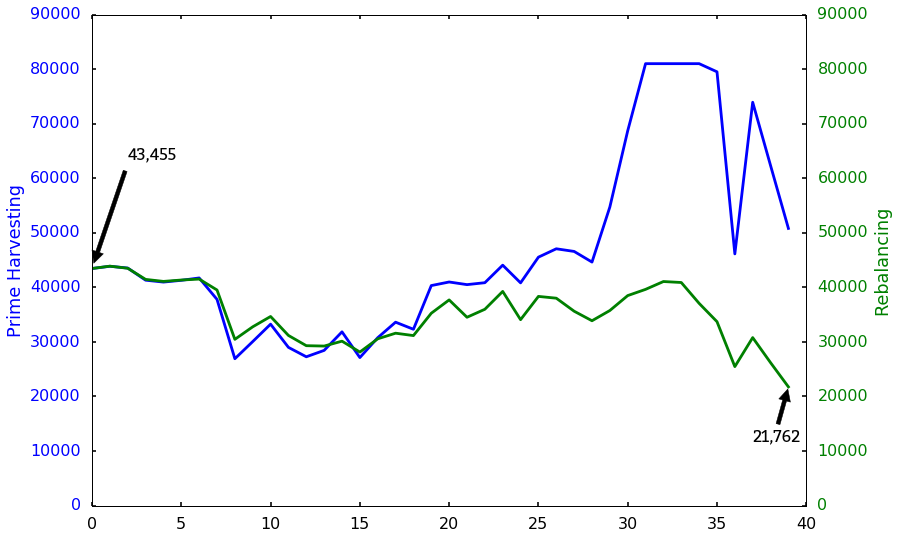

In [6]:
fig, ax1 = plt.subplots()
ax1.plot([n.withdraw_r for n in x], 'b')
ax1.set_ylabel('Prime Harvesting', color='b')
ax1.set_ylim([0, 90000])
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
income = [n.withdraw_r for n in y]
ax2.plot(income, 'g')
ax2.set_ylabel('Rebalancing', color='g')
ax2.set_ylim([0, 90000])
for tl in ax2.get_yticklabels():
    tl.set_color('g')

min_income_index = income.index(min(income))
ax2.annotate("{:,}".format(int(income[0])), xy=(0, income[0]),
             xytext=(0 + 2, income[0] + 20000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontname='Bitter',
             fontsize=16)
ax2.annotate("{:,}".format(int(min(income))), xy=(min_income_index, min(income)),
             xytext=(min_income_index - 2, min(income) - 10000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontname='Bitter',
             fontsize=16)
plt.xlabel('Year of Retirement')

plt.show()